In [12]:
# import utility modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# load raw data
train_policies_complete = pd.read_csv('../data/train_policies_complete.csv', index_col=0)
test_policies_complete = pd.read_csv('../data/test_policies_complete.csv', index_col=0)
drivers_complete = pd.read_csv('../data/drivers_complete.csv', index_col=0)
vehicles_complete = pd.read_csv('../data/vehicles_complete.csv', index_col=0)

In [13]:
class DataValidation:
    def __init__(self, df):
        self._data = df
        self.clean = None
        self.raw_catvars = self._data.select_dtypes(exclude=[np.number])
        self.raw_numvars = self._data.select_dtypes(include=[np.number])

    # returns numpy array of categorical variables as they appear in dataset
    def get_categoric(self):
        return self.raw_catvars.columns.values

    # returns numpy array of numerical variables as they appear in dataset
    def get_numeric(self):
        return self.raw_numvars.columns.values

    # returns df of pct missing data points for each predictor
    def get_missing(self):
        dict_missing = {'col':[], 'pct_missing':[]}

        for col in self._data.columns:
            mean_missing = np.mean(self._data[col].isnull())
            pct_missing = round(mean_missing * 100, 5)
            
            dict_missing['col'].append(col)
            dict_missing['pct_missing'].append(pct_missing)

        df_missing = pd.DataFrame(data=dict_missing)
        return df_missing

    def print_categoric(self):
        for col in self.get_categoric():
            print("{}: {}".format(col, self._data[col].unique()))

    def print_numeric(self):
        # self.get_numeric())
        large = ['credit_score']
        for col in self.get_numeric():
            if col not in large:
                print("{}: {}".format(col, self._data[col].unique()))

In [14]:
train_policy = DataValidation(train_policies_complete)
test_policy = DataValidation(test_policies_complete)
driver = DataValidation(drivers_complete)
vehicle = DataValidation(vehicles_complete)

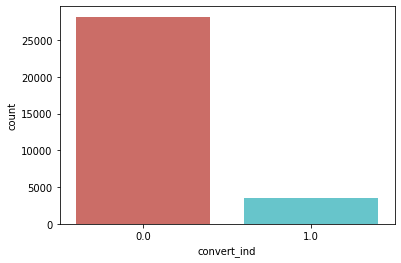

<Figure size 432x288 with 0 Axes>

In [15]:
train_policy._data['convert_ind'].value_counts()
sns.countplot(x='convert_ind', data=train_policy._data, palette='hls')
plt.show()
plt.savefig('../figs/count_plot.png')